<a href="https://colab.research.google.com/github/tarunkay7/AIML-IIITH/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

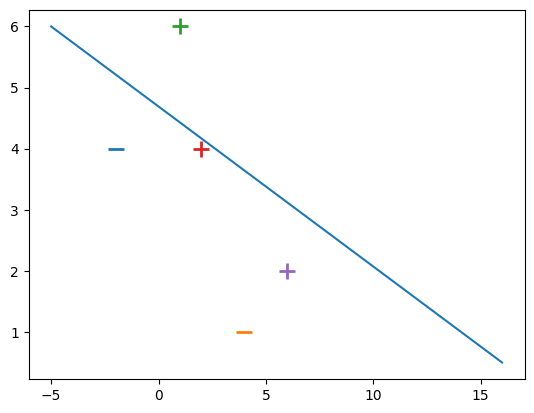

In [12]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-5, 16], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

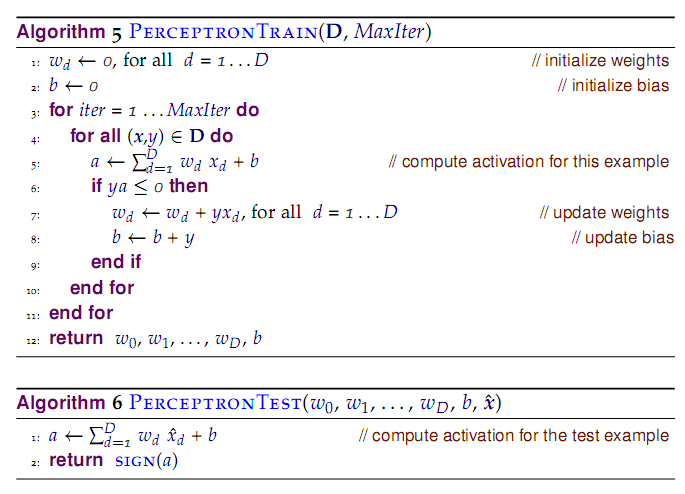

The algorithm is shown in the above image.

In [13]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [45]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    print(X[0])
    print(f"Initial weights{w}")
    eta =0.5
    n = 20
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
                print(w)
        errors.append(total_error*-1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')


    return w

In [49]:
def perceptron_algo_plot1(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    print(X[0])
    print(f"Initial weights{w}")
    eta =0.5
    n = 20
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
                print(w)
        errors.append(total_error*-1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')


    return w

Next, we will see the the training error at each epoch.

[-2  4 -1]
Initial weights[0. 0. 0.]
[ 1.  -2.   0.5]
[-1.  -2.5  1. ]
[-0.5  0.5  0.5]
[2.5 1.5 0. ]
[ 3.5 -0.5  0.5]
[ 1.5 -1.   1. ]
[2.  2.  0.5]
[3. 0. 1.]
[ 1.  -0.5  1.5]
[1.5 2.5 1. ]
[2.5 0.5 1.5]
[0.5 0.  2. ]
[1.  3.  1.5]
[2. 1. 2.]
[0.  0.5 2.5]
[1.  2.5 2. ]
[2.  0.5 2.5]
[0. 0. 3.]
[0.5 3.  2.5]
[1.5 1.  3. ]
[-0.5  0.5  3.5]
[0.  3.5 3. ]
[1.  1.5 3.5]
[-1.  1.  4.]
[0.  3.  3.5]
[1. 1. 4.]
[-1.   0.5  4.5]
[-0.5  3.5  4. ]
[2.5 4.5 3.5]
[3.5 2.5 4. ]
[1.5 2.  4.5]
[2.5 0.  5. ]
[ 0.5 -0.5  5.5]
[1.  2.5 5. ]
[2.  0.5 5.5]
[0. 0. 6.]
[0.5 3.  5.5]
[1.5 1.  6. ]
[-0.5  0.5  6.5]
[0.  3.5 6. ]
[1.  1.5 6.5]


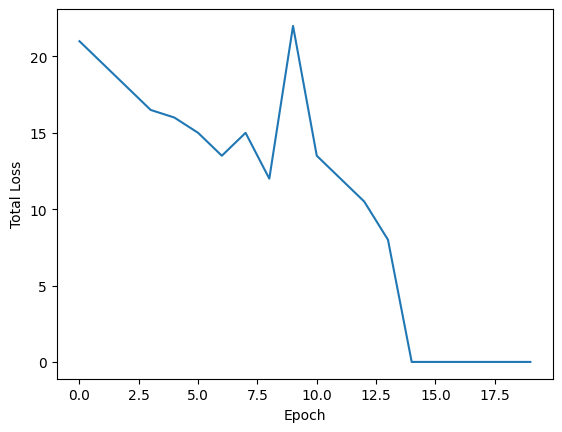

In [46]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

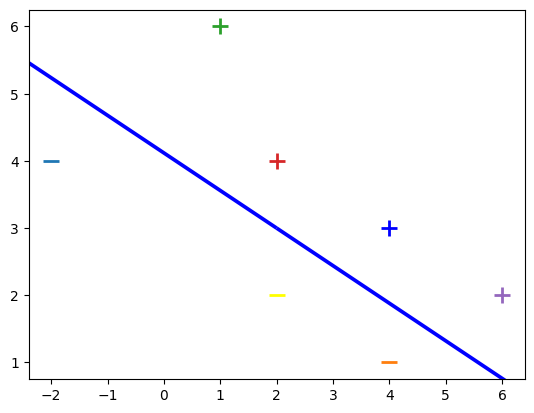

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
ANswer :  On a HUge Learning Rate it would not reach the optimal state but would reach a point where it would oscillate between the points closer to the optimal state
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



[-2  4 -1]
Initial weights[0. 0. 0.]
[ 1.  -2.   0.5]
[-1.  -2.5  1. ]
[-0.5  0.5  0.5]
[2.5 1.5 0. ]
[ 3.5 -0.5  0.5]
[ 1.5 -1.   1. ]
[2.  2.  0.5]
[3. 0. 1.]
[ 1.  -0.5  1.5]
[1.5 2.5 1. ]
[2.5 0.5 1.5]
[0.5 0.  2. ]
[1.  3.  1.5]
[2. 1. 2.]
[0.  0.5 2.5]
[1.  2.5 2. ]
[2.  0.5 2.5]
[0. 0. 3.]
[0.5 3.  2.5]
[1.5 1.  3. ]
[-0.5  0.5  3.5]
[0.  3.5 3. ]
[1.  1.5 3.5]
[-1.  1.  4.]
[0.  3.  3.5]
[1. 1. 4.]
[-1.   0.5  4.5]
[-0.5  3.5  4. ]
[2.5 4.5 3.5]
[3.5 2.5 4. ]
[1.5 2.  4.5]
[2.5 0.  5. ]
[ 0.5 -0.5  5.5]
[1.  2.5 5. ]
[2.  0.5 5.5]
[0. 0. 6.]
[0.5 3.  5.5]
[1.5 1.  6. ]
[-0.5  0.5  6.5]
[0.  3.5 6. ]
[1.  1.5 6.5]


array([1. , 1.5, 6.5])

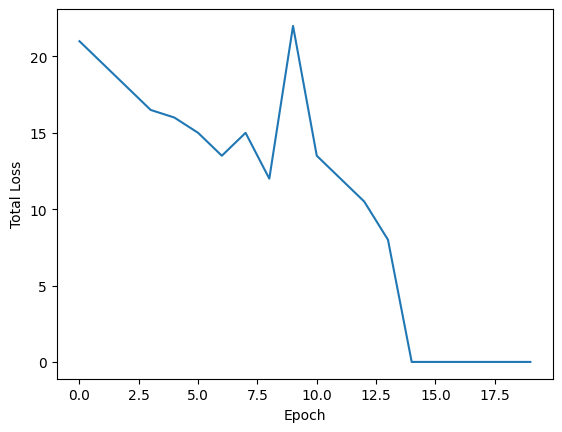

In [50]:
#2. Here i have chnaged the learning rate to half which happens to give the final weights as half of the final weights that i get when learning rate is 1

perceptron_algo_plot1(X,y)

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


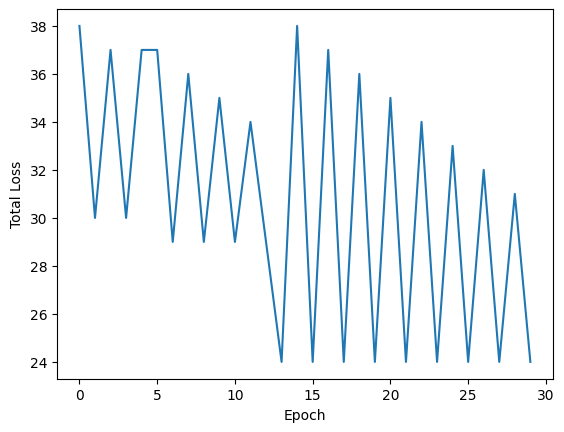

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## Application of Perceptron algorithm on Sonar Dataset

Perceptron Accuracy: 0.81


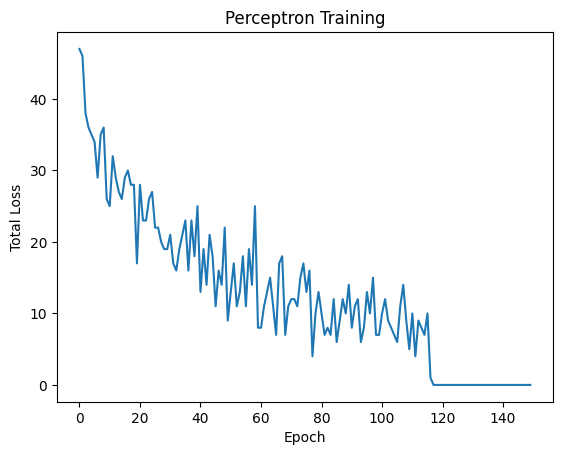

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
column_names = [f"Feature_{i}" for i in range(1, 61)] + ["Class"]
sonar_data = pd.read_csv(url, header=None, names=column_names)

sonar_data["Class"] = sonar_data["Class"].map({"M": 1, "R": 0})

X = sonar_data.drop("Class", axis=1).values
y = sonar_data["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class Perceptron:
    def __init__(self, learning_rate=0.5, n_epochs=200):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for epoch in range(self.n_epochs):
            total_error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                total_error += int(update != 0.0)
            self.errors.append(total_error)
        return self

    def predict(self, X):
        return np.where(np.dot(X, self.weights[1:]) + self.weights[0] > 0, 1, 0)

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)


plt.plot(perceptron.errors)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Training')
plt.show()


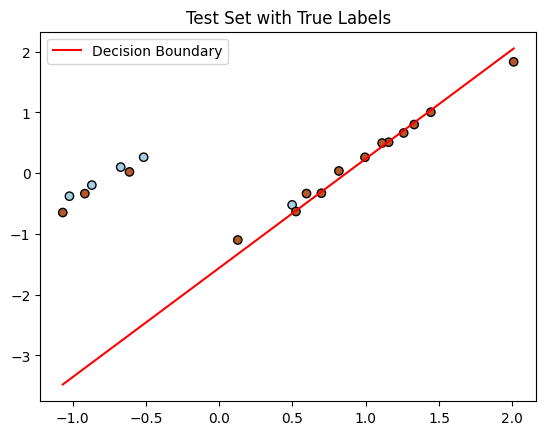

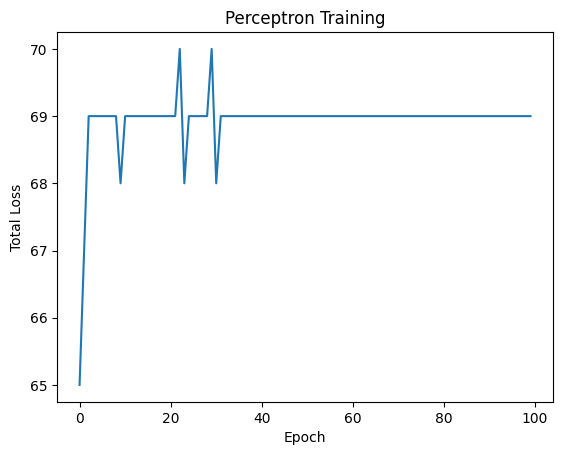

In [67]:
## Application on a non linear Dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)
y = 2 * y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.fit(X_train, y_train)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Test Set with True Labels')

# Plot the decision boundary
w = perceptron.weights
x_decision = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_decision = (-w[1] / w[2]) * x_decision - w[0] / w[2]
plt.plot(x_decision, y_decision, '-r', label='Decision Boundary')

plt.legend()
plt.show()

# Plot the total loss in each epoch
plt.plot(perceptron.errors)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Training')
plt.show()

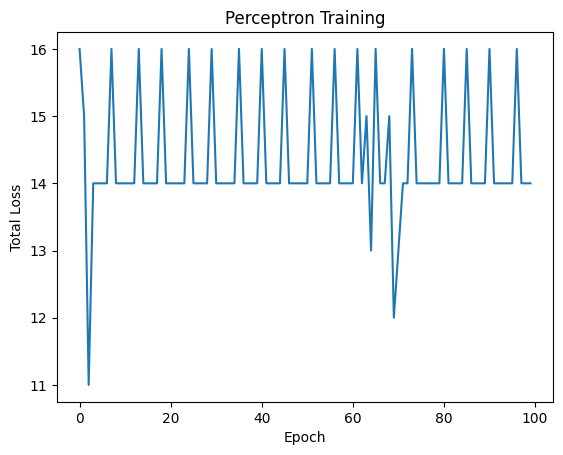

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, random_state=42)
y = 2 * y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for _ in range(self.n_epochs):
            total_error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - np.sign(np.dot(xi, self.weights[1:]) + self.weights[0]))
                self.weights[1:] += update * xi
                self.weights[0] += update
                total_error += int(update != 0.0)
            self.errors.append(total_error)
        return self

    def predict(self, X):
        return np.sign(np.dot(X, self.weights[1:]) + self.weights[0])

perceptron = Perceptron(learning_rate=0.01, n_epochs=100)
perceptron.fit(X_train, y_train)

# Plot the total loss in each epoch
plt.plot(perceptron.errors)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Perceptron Training')
plt.show()
